# Scipy Discrete Distributions

See [Scipy rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) for reference manual.

In [2]:
from scipy import stats
import numpy as np
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

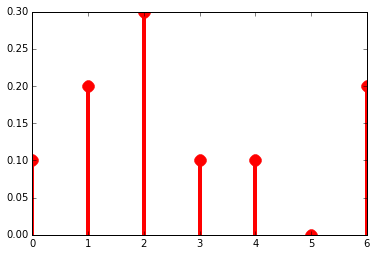

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

In [4]:
custm.stats()

(array(2.7), array(3.8099999999999987))

In [5]:
custm.median()

2.0

In [6]:
custm.mean()

2.7000000000000002

In [7]:
custm.var()

3.8099999999999987

In [8]:
custm.std()

1.9519221295943132

In [9]:
custm.interval(0.05)

(2.0, 2.0)

# Expected Value E[f(x)]

In [10]:
custm.expect(lambda x: x)

2.7000000000000002

In [11]:
custm.expect(lambda x: x * 2)

5.4000000000000004

In [12]:
custm.expect(lambda x: x * 2 + 3)

8.4000000000000004

In [13]:
custm.expect(lambda x: x / 2)

1.3500000000000001

## Probability Function

In [14]:
custm.pmf(3)

0.10000000000000001

In [15]:
custm.pmf(8)

0.0

## Sample

The method rvs() samples one value according to the distribution:

In [23]:
print([custm.rvs() for _ in range(20)])

[6, 0, 3, 2, 2, 6, 3, 3, 2, 2, 4, 1, 1, 2, 0, 3, 2, 1, 0, 6]


If we sample many times, and then count the frequency of each outcome, we get back the same distribution as used in the constructor of the discrete distribution:

In [26]:
from collections import Counter
samples = [custm.rvs() for _ in range(1000)]
estimated = Counter(samples)
estimated

Counter({0: 107, 1: 202, 2: 286, 3: 104, 4: 127, 6: 174})

In [35]:
print("k \t Est \t Prob")
print("--\t-----\t-----")
for k in estimated:
    print("%d \t %.1f \t %2.1f" % (k, estimated[k]/1000, custm.pmf(k)))

k 	 Est 	 Prob
--	-----	-----
0 	 0.1 	 0.1
1 	 0.2 	 0.2
2 	 0.3 	 0.3
3 	 0.1 	 0.1
4 	 0.1 	 0.1
6 	 0.2 	 0.2


## Multi-variate Discrete Distribution

In [36]:
a = np.arange(12).reshape(2, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
from scipy.stats.contingency import margins
m0, m1 = margins(a)
print(m0, '\n', m1)

[[15]
 [51]] 
 [[ 6  8 10 12 14 16]]


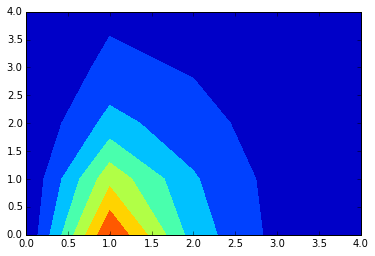

In [92]:
x = np.arange(0, 5)
y = np.arange(0, 5)
xx, yy = np.meshgrid(x, y, indexing="xy")
z = abs(np.sin(xx**2) / (xx**2 + yy**2 + 1))
h = plt.contourf(x,y,z)

In [77]:
xx

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [78]:
yy

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [93]:
z

array([[ 0.        ,  0.42073549,  0.1513605 ,  0.04121185,  0.01693549],
       [ 0.        ,  0.28049033,  0.12613375,  0.03746532,  0.01599463],
       [ 0.        ,  0.14024516,  0.08408917,  0.02943703,  0.01370968],
       [ 0.        ,  0.07649736,  0.05405732,  0.02169045,  0.0110732 ],
       [ 0.        ,  0.04674839,  0.03603821,  0.01585071,  0.00872434]])

In [94]:
z = z / np.sum(z)

In [95]:
z

array([[ 0.        ,  0.25835953,  0.0929454 ,  0.02530681,  0.01039951],
       [ 0.        ,  0.17223969,  0.0774545 ,  0.02300619,  0.00982176],
       [ 0.        ,  0.08611984,  0.05163633,  0.01807629,  0.00841865],
       [ 0.        ,  0.04697446,  0.03319478,  0.01331937,  0.00679968],
       [ 0.        ,  0.02870661,  0.02212986,  0.00973339,  0.00535733]])

In [100]:
z.shape

(5, 5)

In [105]:
m0, m1 = margins(z)
print(m0, '\n', m1)

[[ 0.38701125]
 [ 0.28252214]
 [ 0.16425112]
 [ 0.1002883 ]
 [ 0.06592719]] 
 [[ 0.          0.59240013  0.27736087  0.08944206  0.04079694]]


In [141]:
for i in np.ndindex(z.shape): print(i, z[i])

(0, 0) 0.0
(0, 1) 0.258359528477
(0, 2) 0.0929453965105
(0, 3) 0.0253068113924
(0, 4) 0.0103995148668
(1, 0) 0.0
(1, 1) 0.172239685651
(1, 2) 0.0774544970921
(1, 3) 0.0230061921749
(1, 4) 0.0098217640409
(2, 0) 0.0
(2, 1) 0.0861198428255
(2, 2) 0.0516363313947
(2, 3) 0.0180762938517
(2, 4) 0.0084186548922
(3, 0) 0.0
(3, 1) 0.046974459723
(3, 2) 0.033194784468
(3, 3) 0.0133193744171
(3, 4) 0.00679968279755
(4, 0) 0.0
(4, 1) 0.0287066142752
(4, 2) 0.022129856312
(4, 3) 0.00973338899708
(4, 4) 0.00535732584049
